# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

# Exploratory Data Analysis

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Create a heatmap to check the missing values in the data

<Axes: >

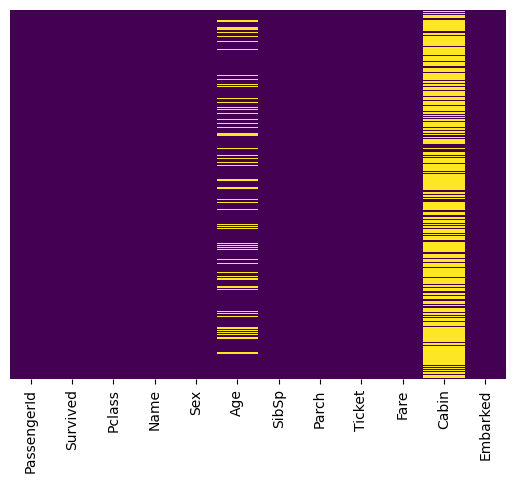

In [6]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

Now check that there a large number of missing values in the cabin column while age column contain less missing values as compared to cabin. so we will simply remove the cabin column while we will fill the missing values of age column.

In [7]:
train.drop(['Cabin'],axis = 1,inplace = True)

<Axes: >

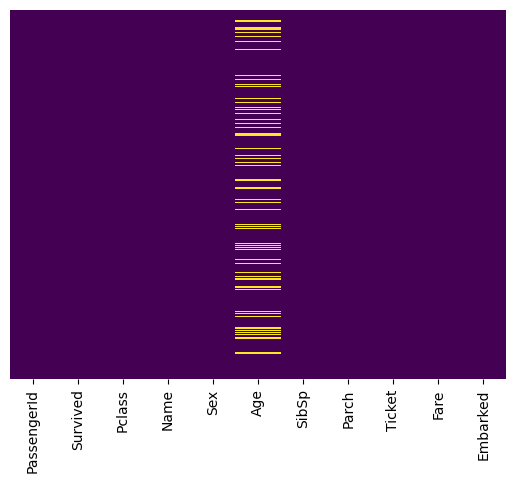

In [8]:
sns.heatmap(train.isnull(),cbar = False,cmap = 'viridis',yticklabels=False)

Lets try to fill missing values in the age column using information given in other columns to fill with reasonable values in the age column

In [ ]:
sns.set_style('whitegrid')

In [ ]:
sns.countplot(x='Survived',data = train, hue = 'Sex')

Plot shows mostly survival group belongs to female group while non survival group belongs to male group

In [ ]:
sns.countplot(x='Survived',data = train, hue = 'Pclass')

Note that the plot shows more people who are not survived belongs to the third class 

In [ ]:
sns.distplot(train['Age'].dropna(),kde = False,bins = 30)

Plot shows that most of the people were in age of  20 to 30

In [ ]:
sns.countplot(x='SibSp',data = train)

In [ ]:
train['Fare'].hist(bins = 40,figsize= (10,4))

In [ ]:
import cufflinks as cf

In [ ]:
cf.go_offline()

Let explore the information at each point on the plot using iplot

In [ ]:
train['Fare'].iplot(kind= 'hist',bins= 50)

Lets try to fill missing values in the age, one way is to drop the rows of missing age but we can fill missing values by taking average age by passenger class

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x= 'Pclass',y= 'Age',data = train)

We can see wealthier passengers in the higher classes tend to be older, which make sense. we'll use these average age values to impute based on Pclass for Age.

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24

# We have created a function that checks age and pclass column
# if age is null and class is 1 then fills age with 37 similarly
# 29 for pclass 2 and 24 for third class

In [21]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis = 1)

Now check the heatmap again and see missing values in the columns

<Axes: >

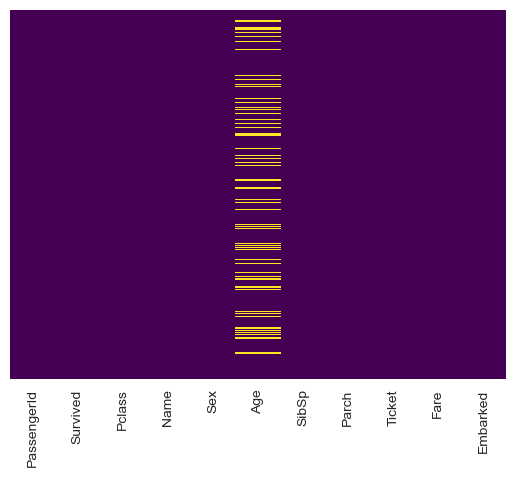

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

Now we have done our first step of cleaning data and  contains no missing values

Since sex and embarked columns are categorical but we can use only numerical values in our machine learning model, So first we have to change these into numerical values

In [ ]:
sex = pd.get_dummies(train['Sex'],dtype = int,drop_first = True)

In [ ]:
embark = pd.get_dummies(train['Embarked'],dtype = int,drop_first=True)

In [ ]:
embark.head()

In [ ]:
train = pd.concat([train,sex,embark],axis = 1)

In [ ]:
train.head()

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket','Fare'],axis = 1,inplace = True)

In [ ]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [ ]:
train.head()

Now we have completely cleaned our data which is ready to use for machine learning model

# Split the data into training and testing data

In [ ]:
X = train.drop('Survived',axis = 1)
y = train['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

# Fit the model on the training datad

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

Now we have trained our model that tells that 154 passengers not survived while 114 survived and it is 71% efficient to detect survived class while 82 efficient to detect unsurvived class